# Project: Graph of ...

In [1]:
# Standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import ssl
import requests

%matplotlib inline


Data source: Open-Meteo (https://open-meteo.com/). Generated using Copernicus Climate Change Service information (2022). ERA5 data: Hersbach et al. (2018), doi: 10.24381/cds.adbb2d47. ERA5-Land data: Muñoz Sabater (2019), doi: 10.24381/cds.e2161bac. CERRA data: Schimanke et al. (accessed 2022-12-31), doi: 10.24381/cds.622a565a.

Rosario, Santa Fe, Argentine and Birmingham, West Midlands, UK



## Get Data

In [2]:
# API endpoints
endpoints = {
    'rosario_argentina': "https://archive-api.open-meteo.com/v1/archive?latitude=-32.95&longitude=-60.64&start_date=2023-03-14&end_date=2023-03-28&hourly=temperature_2m",
    'birmingham_uk':"https://archive-api.open-meteo.com/v1/archive?latitude=52.48&longitude=-1.90&start_date=2022-04-01&end_date=2023-04-01&hourly=temperature_2m,relativehumidity_2m,rain"
}

# Get data
raw_data = {}
for place, url in endpoints.items():
    response = requests.get(url)

    if response.status_code == 200:
        raw_data[place] = response.json()
        print(place)
        print(raw_data[place].keys())
    else:
        print(f"Error: {response.status_code}")

rosario_argentina
dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])
birmingham_uk
dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])


## Clean and organize dataframe

In [15]:
for place, local_data in raw_data.items():
    print(f"{place}: {str(local_data['hourly'].keys())}\n")

rosario_argentina: dict_keys(['time', 'temperature_2m'])

birmingham_uk: dict_keys(['time', 'temperature_2m', 'relativehumidity_2m', 'rain'])



In [6]:
# Get the hourly temperature data
tmp_data = {place: local_data['hourly']['temperature_2m'] for place, local_data in raw_data.items()}


# Filter out non-float values
data_filtered = {'rosario_argentina': [], 'birmingham_uk': []}

for p1, p2 in zip(tmp_data['rosario_argentina'], tmp_data['birmingham_uk']):
    if isinstance(p1, float) and isinstance(p2, float):
        data_filtered['rosario_argentina'].append(p1)
        data_filtered['birmingham_uk'].append(p2)


In [7]:
# Create the DataFrame from the filtered data
graph_data = pd.DataFrame(data_filtered)
graph_data.head()

,rosario_argentina,birmingham_uk
0,31.7,0.3
1,30.8,0.2
2,30.1,-0.1
3,29.5,-0.4
4,28.9,-0.5


## Graph the data

In [ ]:
# Imports specific to this graph

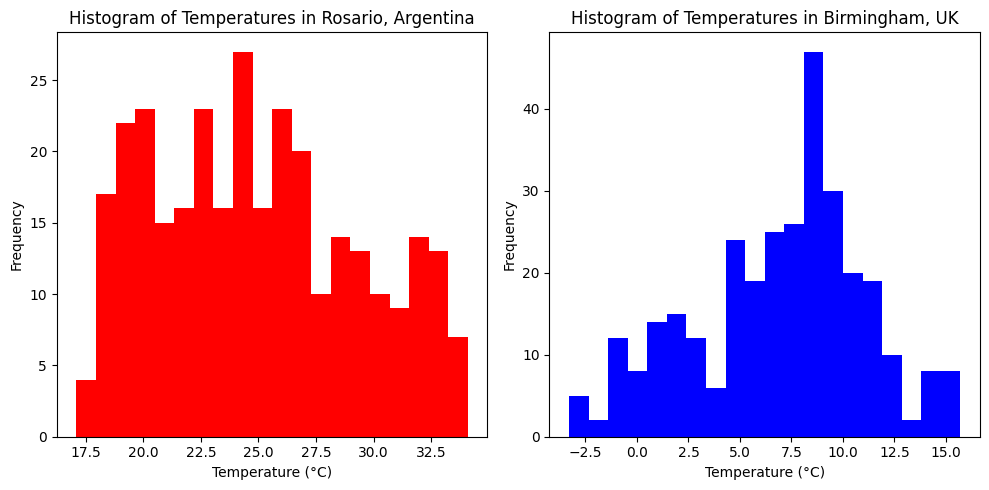

In [11]:
# Create two separate histograms using subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram for "Rosario Argentina" data on ax1
ax1.hist(data_filtered['rosario_argentina'], bins=20, color='red')
ax1.set_title('Histogram of Temperatures in Rosario, Argentina')

# Plot histogram for "Birmingham UK" data on ax2
ax2.hist(data_filtered['birmingham_uk'], bins=20, color='blue')
ax2.set_title('Histogram of Temperatures in Birmingham, UK')

# Set the axis labels and adjust the layout
for ax in (ax1, ax2):
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Frequency')
fig.tight_layout()

# Display the plot
plt.show()

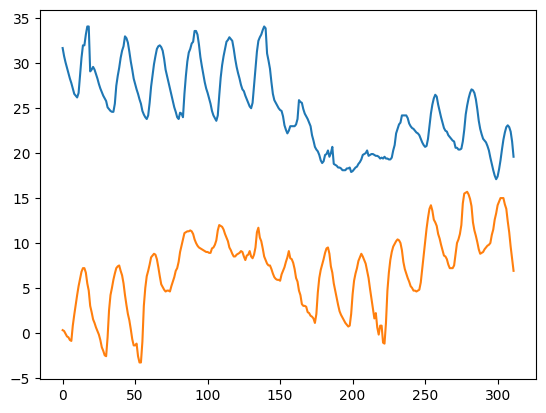

In [14]:
plt.plot(graph_data)
plt.show()

## Conclusions


The data suggests...